In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
pip install gspread-dataframe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import auth
import pandas as pd
from gspread_dataframe import get_as_dataframe
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('MazegenDataset').sheet1
worksheet1 = gc.open('MazegenExecutingTimeDataset').sheet1
# Convert to a DataFrame and render.
mazegen_df = get_as_dataframe(worksheet, usecols=[0,1,2,3,4], nrows=930)
mazegen_exectime_df = get_as_dataframe(worksheet1, usecols=[0,1,2], nrows=10)

In [5]:
mazegen_df

,Run_Number,BNF_Version,Fitness_Score,Population,Fitness_Function
0,1,1.0,3,1000,ffv1
1,1,1.0,3,1000,ffv1
2,1,1.0,3,1000,ffv1
3,1,1.0,3,1000,ffv1
4,1,1.0,3,1000,ffv1
...,...,...,...,...,...
925,15,2.0,4,50000,ffv2
926,15,2.0,4,50000,ffv2
927,15,2.0,4,50000,ffv2
928,15,2.0,4,50000,ffv2


In [17]:
mazegen_exectime_df

,BNF_Version,Population,Execution_Time
0,1.0,1000,480.0
1,1.0,5000,2400.0
2,1.5,1000,1.2
3,1.5,5000,7.8
4,1.5,10000,24.6
5,1.5,50000,600.0
6,2.0,1000,180.0
7,2.0,5000,300.0
8,2.0,10000,780.0
9,2.0,50000,1452.0


# Figure for the different BNF grammar versions

Text(0.5, 1.0, 'Fitness score obtained with different BNF grammars')

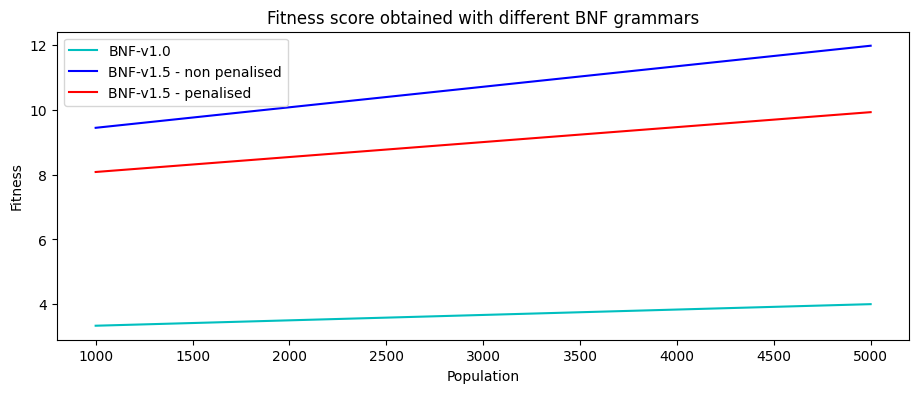

In [7]:
  plt.figure(figsize=(11, 4))
  RUN_1000_v1 = mazegen_df[(mazegen_df['BNF_Version'] == 1.0) & (mazegen_df['Population'] == 1000)]['Fitness_Score'].to_numpy()
  RUN_5000_v1 = mazegen_df[(mazegen_df['BNF_Version'] == 1.0) & (mazegen_df['Population'] == 5000)]['Fitness_Score'].to_numpy()
  RUN_1000_v1_no_penalise = mazegen_df[(mazegen_df['BNF_Version'] == 1.5) & (mazegen_df['Population'] == 1000) & (mazegen_df['Fitness_Function'] == 'ffv1')]['Fitness_Score'].to_numpy()
  RUN_5000_v1_no_penalise = mazegen_df[(mazegen_df['BNF_Version'] == 1.5) & (mazegen_df['Population'] == 5000) & (mazegen_df['Fitness_Function'] == 'ffv1')]['Fitness_Score'].to_numpy()
  RUN_1000_v1_penalise =  mazegen_df[(mazegen_df['BNF_Version'] == 1.5) & (mazegen_df['Population'] == 1000) & (mazegen_df['Fitness_Function'] == 'ffv1p')]['Fitness_Score'].to_numpy()
  RUN_5000_v1_penalise = mazegen_df[(mazegen_df['BNF_Version'] == 1.5) & (mazegen_df['Population'] == 5000) & (mazegen_df['Fitness_Function'] == 'ffv1p')]['Fitness_Score'].to_numpy()

  plots = plt.plot([1000, 5000], [np.mean(RUN_1000_v1),np.mean(RUN_5000_v1)], 'c-', [1000, 5000], [np.mean(RUN_1000_v1_no_penalise),np.mean(RUN_5000_v1_no_penalise)], 'b-' ,[1000,5000], [np.mean(RUN_1000_v1_penalise), np.mean(RUN_5000_v1_penalise)], 'r-' )
  plt.legend(plots, ('BNF-v1.0', 'BNF-v1.5 - non penalised', 'BNF-v1.5 - penalised'), frameon=True)
  plt.ylabel('Fitness'); plt.xlabel('Population');
  plt.title('Fitness score obtained with different BNF grammars')


Text(0.5, 1.0, 'Time spent per thousands of individuals')

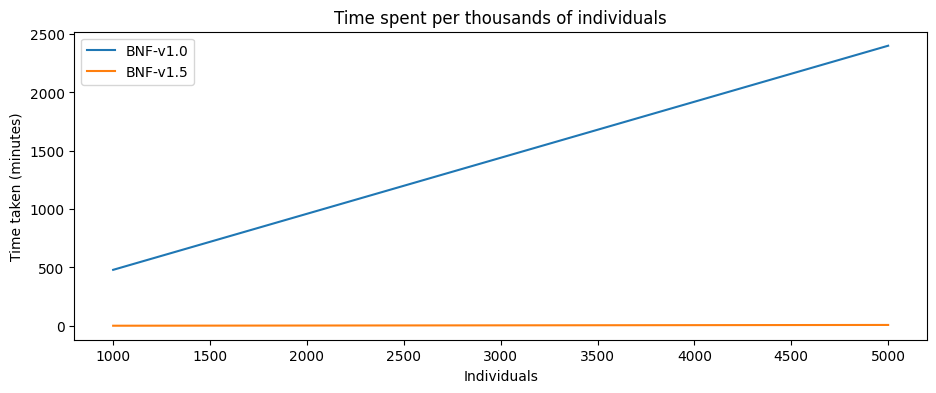

In [23]:
  plt.figure(figsize=(11, 4))

  plots = plt.plot([1000, 5000], [mazegen_exectime_df['Execution_Time'][0], mazegen_exectime_df['Execution_Time'][1]], [1000, 5000], [mazegen_exectime_df['Execution_Time'][2], mazegen_exectime_df['Execution_Time'][3]])
  plt.legend(plots, ('BNF-v1.0', 'BNF-v1.5'), frameon=True)
  plt.ylabel('Time taken (minutes)'); plt.xlabel('Individuals');
  plt.title('Time spent per thousands of individuals')


# Adding MazeGen v2.0

Text(0.5, 1.0, 'Fitness for amount of individuals (BNF v2.0 + penalised overlapping objects)')

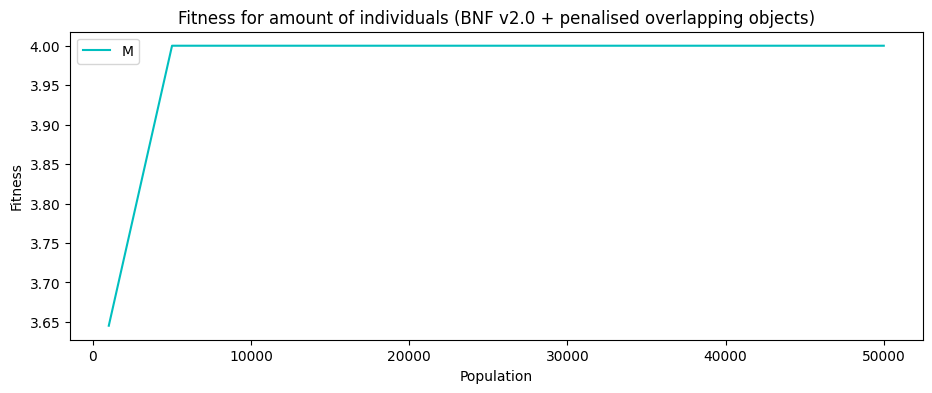

In [9]:
  plt.figure(figsize=(11, 4))
  RUN_1000_v2 = mazegen_df[(mazegen_df['BNF_Version'] == 2.0) & (mazegen_df['Population'] == 1000)]['Fitness_Score'].to_numpy()
  RUN_5000_v2 = mazegen_df[(mazegen_df['BNF_Version'] == 2.0) & (mazegen_df['Population'] == 5000)]['Fitness_Score'].to_numpy()
  RUN_10000_v2 = mazegen_df[(mazegen_df['BNF_Version'] == 2.0) & (mazegen_df['Population'] == 10000)]['Fitness_Score'].to_numpy()
  RUN_50000_v2 = mazegen_df[(mazegen_df['BNF_Version'] == 2.0) & (mazegen_df['Population'] == 50000)]['Fitness_Score'].to_numpy()
 
  plots = plt.plot([1000, 5000, 10000, 50000], [np.mean(RUN_1000_v2),np.mean(RUN_5000_v2),np.mean(RUN_10000_v2),np.mean(RUN_50000_v2)], 'c-')
  plt.legend(plots, ('Maximum Fitness'), frameon=True)
  plt.ylabel('Fitness'); plt.xlabel('Population');
  plt.title('Fitness for amount of individuals (BNF v2.0 + penalised overlapping objects)')

Text(0.5, 1.0, 'Fitness score obtained with different BNF grammars')

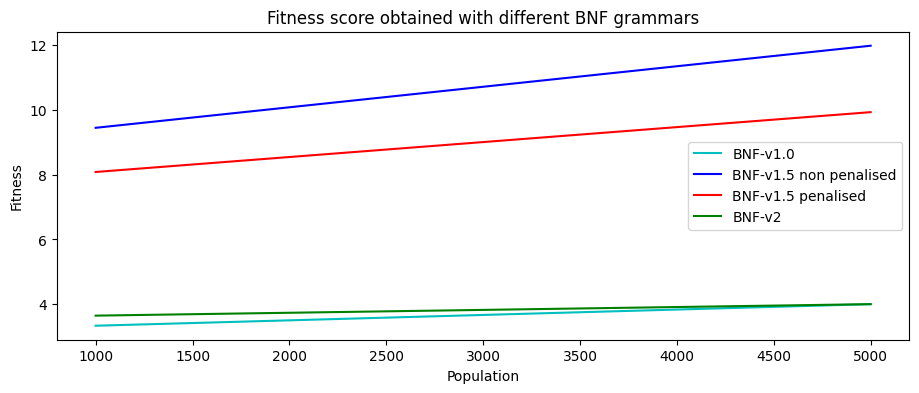

In [8]:
  plt.figure(figsize=(11, 4))
  RUN_1000_v1 = mazegen_df[(mazegen_df['BNF_Version'] == 1.0) & (mazegen_df['Population'] == 1000)]['Fitness_Score'].to_numpy()
  RUN_5000_v1 = mazegen_df[(mazegen_df['BNF_Version'] == 1.0) & (mazegen_df['Population'] == 5000)]['Fitness_Score'].to_numpy()
  RUN_1000_v1_no_penalise = mazegen_df[(mazegen_df['BNF_Version'] == 1.5) & (mazegen_df['Population'] == 1000) & (mazegen_df['Fitness_Function'] == 'ffv1')]['Fitness_Score'].to_numpy()
  RUN_5000_v1_no_penalise = mazegen_df[(mazegen_df['BNF_Version'] == 1.5) & (mazegen_df['Population'] == 5000) & (mazegen_df['Fitness_Function'] == 'ffv1')]['Fitness_Score'].to_numpy()
  RUN_1000_v1_penalise =  mazegen_df[(mazegen_df['BNF_Version'] == 1.5) & (mazegen_df['Population'] == 1000) & (mazegen_df['Fitness_Function'] == 'ffv1p')]['Fitness_Score'].to_numpy()
  RUN_5000_v1_penalise = mazegen_df[(mazegen_df['BNF_Version'] == 1.5) & (mazegen_df['Population'] == 5000) & (mazegen_df['Fitness_Function'] == 'ffv1p')]['Fitness_Score'].to_numpy()
  RUN_5000_v1_penalise = mazegen_df[(mazegen_df['BNF_Version'] == 1.5) & (mazegen_df['Population'] == 5000) & (mazegen_df['Fitness_Function'] == 'ffv1p')]['Fitness_Score'].to_numpy()
  RUN_1000_v2 = mazegen_df[(mazegen_df['BNF_Version'] == 2.0) & (mazegen_df['Population'] == 1000) & (mazegen_df['Fitness_Function'] == 'ffv2')]['Fitness_Score'].to_numpy()
  RUN_5000_v2= mazegen_df[(mazegen_df['BNF_Version'] == 2.0) & (mazegen_df['Population'] == 5000) & (mazegen_df['Fitness_Function'] == 'ffv2')]['Fitness_Score'].to_numpy()


  plots = plt.plot([1000, 5000], [np.mean(RUN_1000_v1),np.mean(RUN_5000_v1)], 'c-', [1000, 5000], [np.mean(RUN_1000_v1_no_penalise),np.mean(RUN_5000_v1_no_penalise)], 'b-' ,[1000,5000], [np.mean(RUN_1000_v1_penalise), np.mean(RUN_5000_v1_penalise)], 'r-', [1000, 5000], [np.mean(RUN_1000_v2), np.mean(RUN_5000_v2)], 'g-')
  plt.legend(plots, ('BNF-v1.0', 'BNF-v1.5 non penalised', 'BNF-v1.5 penalised', 'BNF-v2'), frameon=True)
  plt.ylabel('Fitness'); plt.xlabel('Population');
  plt.title('Fitness score obtained with different BNF grammars')

Text(0.5, 1.0, 'Time spent per thousands of individuals')

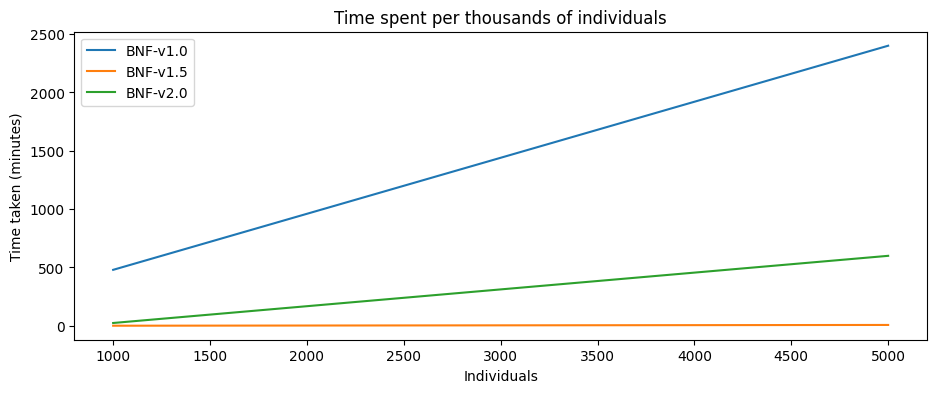

In [27]:
  plt.figure(figsize=(11, 4))

  plots = plt.plot([1000, 5000], [mazegen_exectime_df['Execution_Time'][0], mazegen_exectime_df['Execution_Time'][1]], [1000, 5000], [mazegen_exectime_df['Execution_Time'][2], mazegen_exectime_df['Execution_Time'][3]], [1000, 5000], [mazegen_exectime_df['Execution_Time'][4], mazegen_exectime_df['Execution_Time'][5]])
  plt.legend(plots, ('BNF-v1.0', 'BNF-v1.5', 'BNF-v2.0'), frameon=True)
  plt.ylabel('Time taken (minutes)'); plt.xlabel('Individuals');
  plt.title('Time spent per thousands of individuals')